In [18]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import pickle

from scipy import stats


In [19]:
address_main = '/'
address_pickle = address_main + 'results/iris pickle_bigmac100,3rdClass.pickle'

address_save_figure = address_main +'irisdataset_inversion_VS_rho.png'
address_save_figure2 = address_main +'irisdataset_inversion_VS_rho2.png'

In [20]:
with open(address_pickle, "rb") as input_file:
    [dic_inversions_F1_,dic_inversions_LL] = pickle.load(input_file)

In [21]:
# working with percentage instead of fractions
for key1 in dic_inversions_F1_.keys() :
    for key2 in range(0,len(dic_inversions_F1_[key1])):
        dic_inversions_F1_[key1][key2] *= 100
        dic_inversions_LL[key1][key2] *= 100

In [22]:
# P-Values
p_values_wilcoxon = []
for rho in dic_inversions_F1_.keys():
    p_values_wilcoxon.append(100*wilcoxon(dic_inversions_F1_[rho], dic_inversions_LL[rho]).pvalue)

/Users/vu/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/vu/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se


# MAIN CELL

In [23]:
percentiles = range(0,101,10)

In [24]:
inversions_F1_h_percentiles ={}

for p in percentiles:
    inversions_F1_h_percentiles[p] = []
    
for key in dic_inversions_F1_.keys() :    
    for p in percentiles:
        inversions_F1_h_percentiles[p].append(np.percentile(dic_inversions_F1_[key],p))



In [10]:
inversions_LEE_percentiles ={}

for p in percentiles:
    inversions_LEE_percentiles[p] = []
    
for key in dic_inversions_LL.keys() :    
    for p in percentiles:
        inversions_LEE_percentiles[p].append(np.percentile(dic_inversions_LL[key],p))




####  Kolmogorov-Smirnov

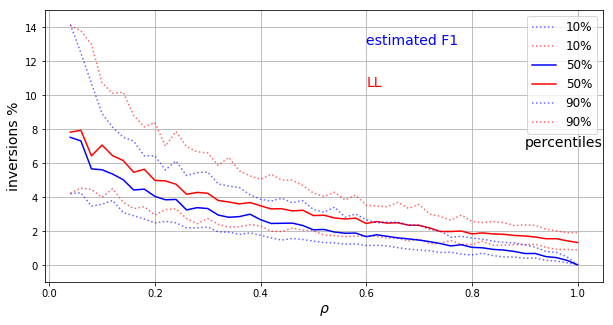

In [41]:
plt.figure(figsize=(10,5))

for p in [10,50,90]:
    if p == 50:
        linestyle = '-'
    else:
        linestyle = ':'
        
    plt.plot(np.arange(0.04,1.02,0.02),inversions_F1_h_percentiles[p][1:], c='b', alpha = max(0.6,1- abs(50-p)/50), linestyle=linestyle)
    plt.plot(np.arange(0.04,1.02,0.02),inversions_LEE_percentiles[p][1:], c='r', alpha = max(0.6,1- abs(50-p)/50), linestyle=linestyle)
plt.text(x=0.90,y=7,s="percentiles",color='k',fontsize=14)    
plt.text(x=0.60,y=13,s="estimated F1",color='b',fontsize=14)
plt.text(x=0.60,y=10.5,s="LL",color='r',fontsize=14)  
 

plt.ylim(-1,15)

plt.grid(axis='both')
plt.xlabel(r'$\rho$',fontsize=14)
plt.ylabel('inversions %',fontsize=14)

percentiles = [10,50,90]
leg = [None]*(len(percentiles)*2)
leg[::2] = percentiles
leg[1::2] = percentiles

leg = [str(x)+'%' for x in  leg]


plt.legend( leg ,fontsize=12)


plt.savefig(address_save_figure2)
plt.show()

In [1]:
# FIG 4.B

<Figure size 576x288 with 0 Axes>

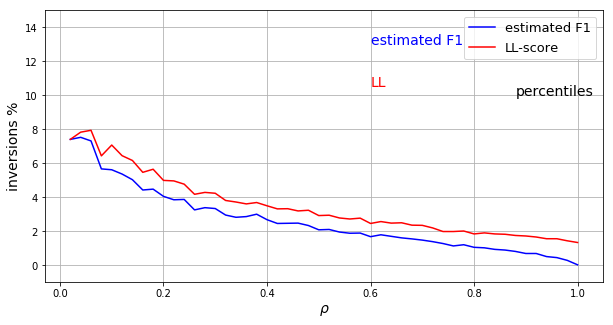

In [13]:
plt.figure(figsize=(10,5))

p = 50    
linestyle = '-'

        
plt.plot(np.arange(0.02,1.02,0.02),inversions_F1_h_percentiles[p], c='b', alpha = max(0.6,1- abs(50-p)/50), linestyle=linestyle)
plt.plot(np.arange(0.02,1.02,0.02),inversions_LEE_percentiles[p], c='r', alpha = max(0.6,1- abs(50-p)/50), linestyle=linestyle)

plt.text(x=0.88,y=10,s="percentiles",color='k',fontsize=14)    
plt.text(x=0.60,y=13,s="estimated F1",color='b',fontsize=14)
plt.text(x=0.60,y=10.5,s="LL",color='r',fontsize=14)  
 

plt.ylim(-1,15)

plt.grid(axis='both')
plt.xlabel(r'$\rho$',fontsize=14)
plt.ylabel('inversions %',fontsize=14)

percentiles = [10,50,90]
leg = [None]*(len(percentiles)*2)
leg[::2] = percentiles
leg[1::2] = percentiles

plt.legend(['estimated F1', 'LL-score'],fontsize=13)


#plt.savefig(address_save_figure2)
plt.show()

####  Wilcoxon

In [16]:
from scipy import stats


In [2]:
for key in dic_inversions_F1_.keys():
    x = dic_inversions_F1_[key]
    y = dic_inversions_LL[key]
    p_val = stats.wilcoxon(x, y).pvalue
    print(key, p_val)


NameError: name 'dic_inversions_F1_' is not defined